Kasus yang digunakan adalah memprediksi klasifikasi diabetes menggunakan dataset Pima Indian Diabetes, dengan fitur kesehatan seperti glukosa, BMI, usia, insulin, dan tekanan darah.

Studi Kasus: https://www.datacamp.com/tutorial/decision-tree-classification-python

Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Kode ini mengimpor perpustakaan yang diperlukan untuk membangun model pengklasifikasi pohon keputusan.


*   pandas adalah perpustakaan yang digunakan untuk manipulasi data dan analisis.
*   DecisionTreeClassifier adalah sebuah kelas dari  sklearn.tree modul yang digunakan untuk membangun model pengklasifikasi pohon keputusan.
*   train_test_split adalah fungsi dari  sklearn.model_selection modul yang digunakan untuk membagi dataset menjadi set pelatihan dan pengujian.
*   metrics adalah modul dari  sklearn perpustakaan yang menyediakan berbagai metrik untuk mengevaluasi kinerja model pembelajaran mesin.





In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/diabetes.csv", skiprows=1, names=col_names)

# Convert all feature and label columns to numeric, coercing errors.
# This ensures that any remaining non-numeric values (if any were not handled by skiprows) are converted to NaN.
for col in col_names:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

# Drop rows that might contain NaN values after coercion, as they cannot be used for training.
pima.dropna(inplace=True)

# Ensure the 'label' column is integer type, as it represents categories 0 or 1
pima['label'] = pima['label'].astype(int)

Kode ini membuat daftar nama kolom yang disebut "diabetes.csv" col_names yang akan digunakan untuk memberi label kolom pada suatu dataset. Kemudian, dataset bernama "diabetes.csv" dimuat ke dalam Pandas DataFrame yang disebut "diabetes.csv" pima. header=NoneArgumen ini menetapkan bahwa dataset tersebut tidak memiliki baris header, dan names=col_names argumen ini menetapkan nama kolom dari col_names daftar tersebut ke DataFrame.

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Fungsi ini pima.head() digunakan untuk menampilkan beberapa baris pertama dari kumpulan data pima. Ini berguna untuk mendapatkan gambaran umum data secara cepat dan memeriksa apakah data telah dimuat dengan benar. Secara default, head() fungsi ini menampilkan 5 baris pertama dari kumpulan data, tetapi dapat menentukan jumlah baris yang berbeda untuk ditampilkan dengan memberikan argumen integer ke fungsi tersebut.

In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

Kode ini digunakan untuk membagi dataset menjadi fitur dan variabel target.
*   Baris pertama mendefinisikan daftar kolom fitur yang akan digunakan untuk membuat matriks fitur. Daftar ini berisi nama-nama kolom yang akan digunakan sebagai fitur, yang 'hamil', 'ins bodoh', 'bmi', 'age', 'glucose', 'bp', dan 'pedigree'.
*   Baris kedua menciptakan matriks fitur X dengan memilih kolom yang ditentukan dalam daftar fitur-cols dari dataset pima. Matriks fitur X akan berisi nilai-nilai kolom yang dipilih untuk setiap pengamatan di dataset.
* Baris ketiga menciptakan variabel target y dengan memilih kolom 'label' dari dataset pima. Variabel target y akan berisi nilai kolom 'label' untuk setiap pengamatan dalam dataset.

Secara keseluruhan, kode ini digunakan untuk menyiapkan data untuk pembelajaran mesin dengan memisahkan fitur dan target variabel menjadi variabel terpisah.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Kode ini menggunakan train_test_split fungsi dari sklearn.model_selection modul untuk membagi kumpulan data menjadi kumpulan pelatihan dan kumpulan pengujian.
* Variabel X dan y masing-masing mewakili fitur dan variabel target dari kumpulan data. Parameter test_size diatur ke 0,3, yang berarti 30% data akan digunakan untuk pengujian dan 70% akan digunakan untuk pelatihan. Parameter random_state diatur ke 1, yang memastikan bahwa pemisahan acak yang sama dihasilkan setiap kali kode dijalankan.
* Fungsi ini mengembalikan empat larik: X_train, X_test, y_train, dan y_test. X_train dan y_train mewakili set pelatihan, sementara X_test dan y_test mewakili set pengujian. Larik-larik ini dapat digunakan untuk melatih dan mengevaluasi model pembelajaran mesin.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Kode ini membuat objek pengklasifikasi pohon keputusan menggunakan DecisionTreeClassifier() fungsi tersebut. Kemudian, kode tersebut melatih pengklasifikasi menggunakan fit() metode dengan data pelatihan X_train dan y_train. Terakhir, kode tersebut menggunakan pengklasifikasi yang telah dilatih untuk memprediksi respons untuk dataset uji X_test dan menyimpan prediksi tersebut dalam y_pred.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


* Fungsi metrics.accuracy_score() digunakan untuk menghitung akurasi model klasifikasi. Fungsi ini membutuhkan dua argumen: y_test dan y_pred. y_test adalah label sebenarnya dari set pengujian, dan y_pred adalah label yang diprediksi dari set pengujian.
* Fungsi print() digunakan untuk menampilkan skor akurasi di konsol. Outputnya berupa string bertuliskan "Akurasi:" diikuti dengan skor akurasi aktual.

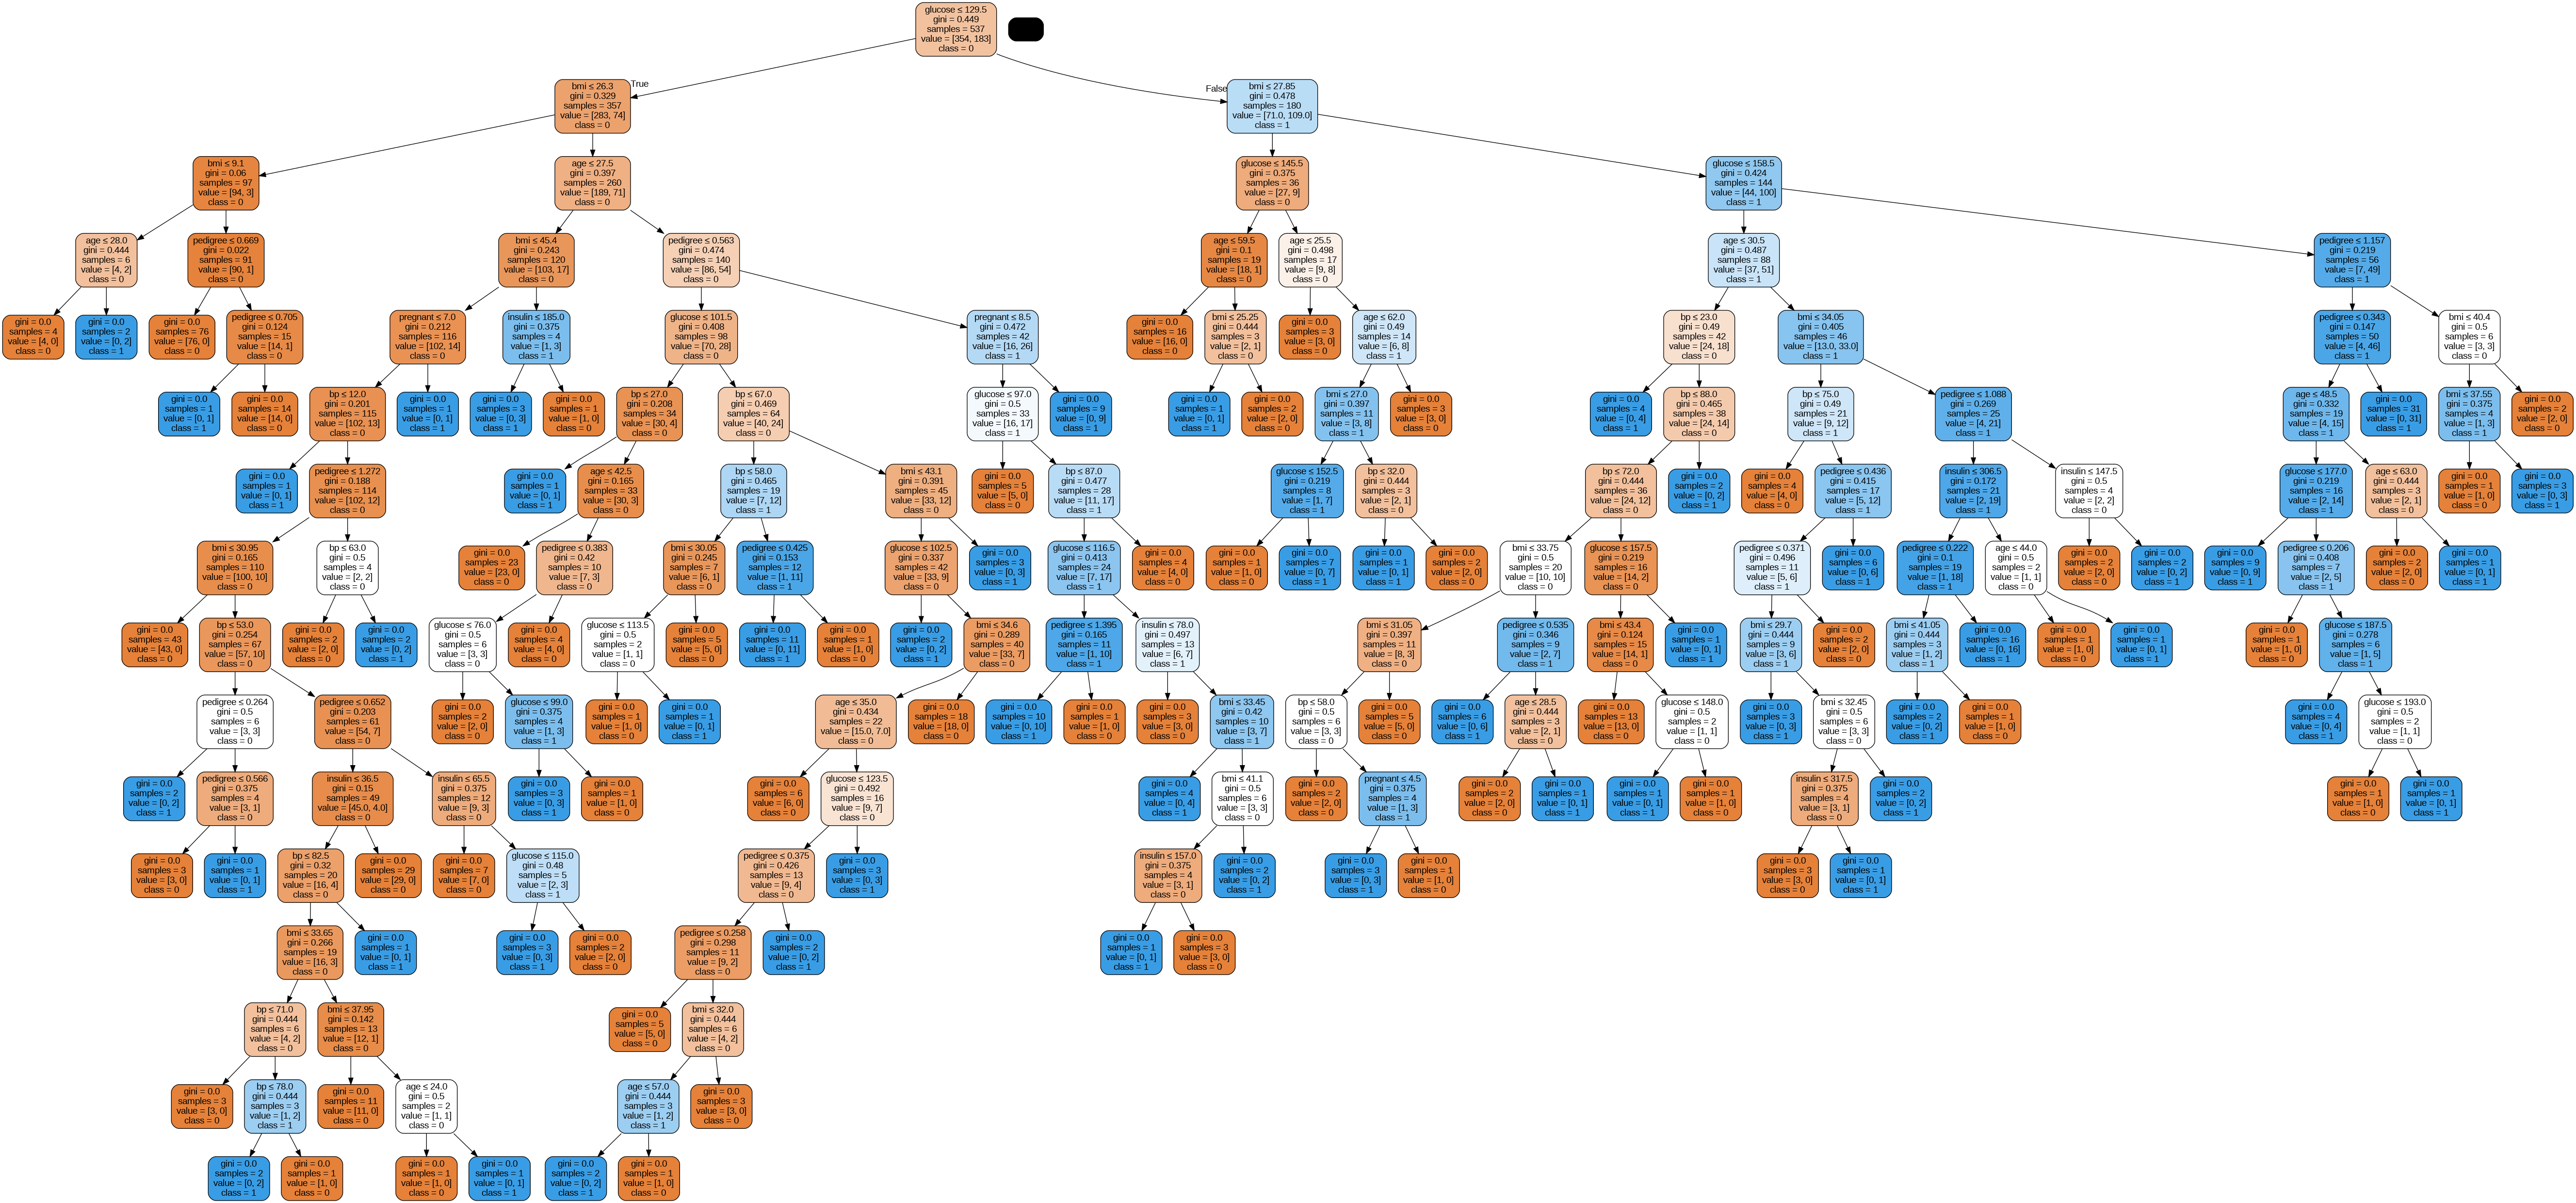

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Kode ini digunakan untuk memvisualisasikan model pohon keputusan yang dibuat menggunakan clf objek scikit-learn.
* Pertama, pustaka yang diperlukan yaitu: export_graphviz dari sklearn.tree, String IO dari sklearn.externals.six, Image dari IPython.display, dan pydotplus.
* Kemudian, sebuah StringIO objek dibuat untuk menyimpan data titik yang dihasilkan oleh export_graphviz. Fungsi export_graphviz tersebut dipanggil dengan clf objek sebagai argumen pertama dan berbagai parameter untuk menyesuaikan tampilan pohon. Data titik tersebut kemudian ditulis ke StringIO objek tersebut.
* Selanjutnya, pydotplus digunakan untuk membuat grafik dari data titik yang tersimpan dalam StringIO objek. Grafik yang dihasilkan disimpan sebagai berkas PNG bernama "diabetes.png". Terakhir, grafik ditampilkan menggunakan Image format IPython.display.png.

Secara keseluruhan, kode ini menghasilkan representasi visual dari model pohon keputusan, yang dapat berguna untuk memahami bagaimana model membuat prediksi dan mengidentifikasi area yang perlu diperbaiki.

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Kode ini digunakan untuk membuat pengklasifikasi pohon keputusan dan melatihnya pada kumpulan data.
* Pertama, kelas DecisionTreeClassifier diimpor dan objek kelas ini dibuat dengan kriteria yang ditetapkan ke "entropi" dan kedalaman maksimum pohon ditetapkan ke 3.
* Selanjutnya, metode fit() dipanggil pada objek pengklasifikasi dengan data pelatihan (X_train dan y_train) sebagai argumen. Ini melatih pohon keputusan berdasarkan data yang diberikan.
* Setelah pelatihan, metode predict() dipanggil pada objek pengklasifikasi dengan data uji (X_test) sebagai argumen. Hal ini menghasilkan prediksi untuk data uji berdasarkan pohon keputusan yang telah dilatih.
* Terakhir, akurasi pengklasifikasi dihitung menggunakan metode akurasi_skor() dari modul metrik dan dicetak ke konsol. Ini memberikan indikasi seberapa baik pohon keputusan mampu mengklasifikasikan data uji.

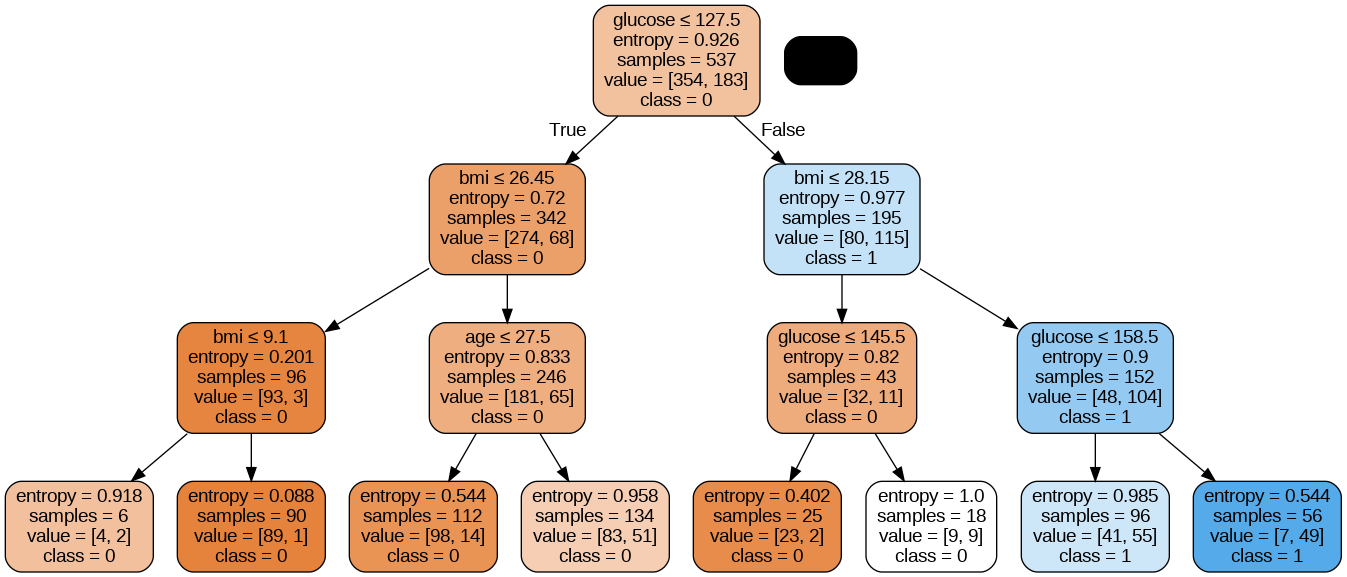

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


*   Impor perpustakaan yang dibutuhkan.
*   String IO objek yang disebut dot_data untuk memegang representasi teks dari pohon keputusan.
*   Mengekspor pohon keputusan untuk dot Format menggunakan export_graphviz fungsi dan menulis output untuk dot_data penyangga.
*   Pydot plus yaitu grafik objek dari dot format representasi dari pohon keputusan yang disimpan dalam dot_data penyangga.
*   Menulis grafik yang dihasilkan ke file PNG bernama "diabetes.png".
*   Menampilkan gambar PNG yang dihasilkan dari pohon keputusan menggunakan Image objek dari IPython.display modul.